# kospi 데이터 전처리 및 상관분석

> 설명) *kospi.csv*파일의 데이터 전처리 및 변수 간 상관분석을 진행한 파일입니다.
해당 상관분석결과를 토대로 변수 사용여부를 결정할 계획입니다.

### 모듈 및 데이터 준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from encodings import euc_kr
import seaborn as sns

In [3]:
kospi = pd.read_csv('./kospi_train_1.csv',encoding='utf_8')
kospi.head(6)

,날짜,지수종가,diff,Y_TF,Y,거래량,거래대금,상장주식수,시가총액,자본금,...,보합종목수,상한종목수,하한종목수,연중최고가종목수,연중최저가종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수,배당 수익율
0,2001-01-02,520.95,68.97,True,상승,231014600,1223328,19638887,191252891,84895076,...,22,167,16,0,0,26,73,1,85,0.0
1,2001-01-03,521.43,39.38,True,상승,324584400,1583403,19633559,191363161,84868436,...,52,85,6,0,0,28,71,1,12,0.0
2,2001-01-04,558.02,3.77,True,상승,444540900,2984761,19634734,204074166,84873582,...,20,149,3,0,0,42,57,1,2,0.0
3,2001-01-05,580.85,7.02,True,상승,578286000,3569582,19637038,212089180,84885103,...,37,92,9,0,0,43,56,3,2,0.0
4,2001-01-08,586.65,12.35,True,상승,558645100,2948092,19630735,214231273,84853590,...,45,72,5,0,0,43,56,6,1,0.0
5,2001-01-09,589.92,13.50,True,상승,558967700,2833998,19636252,215355041,84881174,...,49,64,8,0,0,48,51,6,1,0.0


In [4]:
# 5일 후 지수종가 만들기
kospi_after_5 = pd.DataFrame(kospi['지수종가'].shift(-5))
kospi_after_5.columns = ['5일후 지수종가']
kospi_after_5

,5일후 지수종가
0,589.92
1,560.81
2,561.79
3,587.87
4,599.00
5,603.42
6,595.83
7,604.05
8,619.78
9,627.45


## 배당 수익율 0 제외 & 5일 후 지수종가 상관관계


> 문제점) 결측치 0이 많이 존재하는 *배당 수익율* 변수가 target 변수인 *5일후 지수종가* 와의 corr.값이 0.57

> Q. *배당 수익율* 변수를 사용해야하는가?

> 해결 방법) 결측치 0이 많이 존재하는 변수 *배당 수익율*을 0을 포함한 데이터(ver.1)과 0을 포함하지 않은 데이터(ver.2)로 나누어 기준일의 *5일 후 지수종가*변수와 상관관계를 분석한 후 결정한다.


In [3]:
kospi_noB = kospi[kospi['배당 수익율']!=0]
kospi_noB = kospi_noB[['배당 수익율']]

#kospi_after_5 = kospi_after_5[5:].reset_index().drop('index',axis = 1)
#kospi_after_5.columns = ['5일후 지수종가']

In [4]:
kospi_2 = pd.concat([kospi,kospi_after_5],axis = 1)
kospi_2 = kospi_2[['5일후 지수종가','배당 수익율']]
kospi_2 = kospi_2[kospi_2['배당 수익율']!=0]
kospi_2 = kospi_2[:-5]
kospi_2

,5일후 지수종가,배당 수익율
2909,2002.37,1.32
2910,2003.44,1.32
2911,1991.41,1.33
2912,1980.44,1.34
2913,1988.70,1.33
2914,1996.21,1.33
2915,1996.03,1.33
2916,1992.68,1.33
2917,1995.17,1.33
2918,1981.89,1.34


> 2012-09-21부터 2016-12-22까지만 배당 수익율이 존재

In [5]:
kospi_2.corr()

,5일후 지수종가,배당 수익율
5일후 지수종가,1.000000,-0.090073
배당 수익율,-0.090073,1.000000


> 배당 수익율의 결측값(0)을 제외하고 상관관계를 분석한 결과, 상관관계가 <u>없는</u> 것이 확인되었음

In [6]:
kospi_2_1 = pd.concat([kospi['배당 수익율'],kospi_after_5],axis = 1)
kospi_2_1.corr()

,배당 수익율,5일후 지수종가
배당 수익율,1.000000,0.573293
5일후 지수종가,0.573293,1.000000


> 결측치를 포함하고 상관관계를 분석하면 상관계수=0.57
결측치 처리 후의 결과는 상관관계가 없다고 확인되었으므로 **배당 수익율은 사용하지 않는다**

In [283]:
kospi.describe()

,지수종가,diff,거래량,거래대금,상장주식수,시가총액,자본금,외국인보유주식수,외국인보유시가총액,신용거래종목수,...,보합종목수,상한종목수,하한종목수,연중최고가종목수,연중최저가종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수,배당 수익율
count,3962.000000,3957.000000,3.962000e+03,3.962000e+03,3.962000e+03,3.962000e+03,3.962000e+03,3.962000e+03,3.962000e+03,3962.000000,...,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000
mean,1472.899051,1.869818,4.283206e+08,4.240035e+06,2.955474e+07,7.961384e+08,9.219911e+07,5.128217e+06,2.732286e+08,935.962898,...,70.644119,10.657496,3.633266,11.164816,11.977537,286.771075,281.244321,23.279404,18.569914,0.342115
std,526.870394,41.687704,1.951597e+08,1.804695e+06,6.147979e+06,3.658215e+08,8.779720e+06,1.004464e+06,1.184265e+08,139.040240,...,17.361332,11.759822,14.639195,42.573919,57.961620,266.807403,260.987508,24.735479,42.331953,0.575983
min,468.760000,-319.920000,1.363290e+08,9.163930e+05,1.870447e+07,1.699843e+08,7.858320e+07,2.701890e+06,5.823829e+07,124.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,918.462500,-20.250000,3.082319e+08,2.867355e+06,2.348533e+07,4.090806e+08,8.372682e+07,4.817903e+06,1.689848e+08,801.000000,...,60.000000,4.000000,0.000000,0.000000,0.000000,47.000000,51.000000,7.000000,3.000000,0.000000
50%,1644.595000,5.530000,3.859440e+08,4.103301e+06,3.013184e+07,8.534402e+08,9.228283e+07,5.472040e+06,2.785417e+08,942.000000,...,72.000000,8.000000,2.000000,0.000000,0.000000,84.000000,91.000000,16.000000,7.000000,0.000000
75%,1957.202500,26.930000,4.946896e+08,5.324061e+06,3.517006e+07,1.148981e+09,9.960892e+07,5.666119e+06,3.863538e+08,1055.000000,...,83.000000,14.000000,4.000000,0.000000,0.000000,549.000000,449.000000,31.000000,17.000000,1.070000
max,2228.960000,212.530000,2.379294e+09,1.350498e+07,4.103172e+07,1.356487e+09,1.106207e+08,6.691992e+06,4.653798e+08,1282.000000,...,122.000000,376.000000,621.000000,964.000000,964.000000,922.000000,1060.000000,232.000000,771.000000,1.730000


## 연중최고가 종목수 & 연중최저가 종목수 확인

In [8]:
#kospi_noHJ = kospi[kospi['연중최고가종목수']!=0]
#kospi_noHJ = kospi_noHJ[['날짜','연중최고가종목수']]
#kospi_noHJ

kospi_3 = pd.concat([kospi,kospi_after_5],axis = 1)
kospi_3 = kospi_3[['5일후 지수종가','연중최고가종목수']]
kospi_3 = kospi_3[kospi_3['연중최고가종목수']!=0]
#kospi_3 = kospi_3[:-5]
kospi_3

,5일후 지수종가,연중최고가종목수
1109,1021.71,96
1111,1019.01,68
1112,1026.82,61
1114,1040.43,65
1115,1043.88,55
1116,1050.16,47
1117,1061.93,72
1118,1059.60,50
1119,1062.43,51
1120,1075.48,69


In [9]:
kospi_3.corr()

,5일후 지수종가,연중최고가종목수
5일후 지수종가,1.000000,0.010484
연중최고가종목수,0.010484,1.000000


In [5]:
#kospi_noHJ = kospi[kospi['연중최고가종목수']!=0]
#kospi_noHJ = kospi_noHJ[['날짜','연중최고가종목수']]
#kospi_noHJ

kospi_4 = pd.concat([kospi,kospi_after_5],axis = 1)
kospi_4 = kospi_4[['지수종가','5일후 지수종가','연중최저가종목수','연중최고가종목수']]
kospi_4.corr()

,지수종가,5일후 지수종가,연중최저가종목수,연중최고가종목수
지수종가,1.000000,0.996866,-0.023994,0.000769
5일후 지수종가,0.996866,1.000000,-0.025907,-0.000404
연중최저가종목수,-0.023994,-0.025907,1.000000,0.514617
연중최고가종목수,0.000769,-0.000404,0.514617,1.000000


## 배당 수익율, 연중최저가종목수, 연중최고가종목수 제외한 kospi의 상관분석

In [336]:
# kospi_1 = correlation을 위해 numeric변수만 추출한 데이터
kospi_1 = kospi.drop(['날짜','Y','Y_TF','diff','배당 수익율','연중최저가종목수','연중최고가종목수','신용자료일자'],axis = 1)

In [342]:
# kospi_1_after_5 = kospi_1에서 kospi_after_5변수를 더한 ver.
kospi_1_after_5 = pd.concat([kospi_1,kospi_after_5],axis = 1)
kospi_1_after_5 = kospi_1_after_5[:-5]
#kospi_1_after_5.tail()
kospi_1_after_5.corr()

,지수종가,거래량,거래대금,상장주식수,시가총액,자본금,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용가능종목거래량,...,상승종목수,하락종목수,보합종목수,상한종목수,하한종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수,5일후 지수종가
지수종가,1.000000,-0.363108,0.656707,0.878087,0.986776,0.472682,0.845577,0.972259,0.891906,-0.168583,...,0.073392,0.079213,0.128843,-0.382458,-0.156091,0.747176,0.716850,0.261448,0.020529,0.996866
거래량,-0.363108,1.000000,0.026518,-0.207839,-0.345295,0.189114,-0.454913,-0.376476,-0.302386,0.756287,...,0.016364,-0.008733,-0.306506,0.260768,0.056265,-0.160250,-0.181036,-0.029074,-0.025967,-0.365723
거래대금,0.656707,0.026518,1.000000,0.509123,0.601412,0.226837,0.457454,0.534361,0.484318,0.095287,...,0.076281,0.085124,-0.145475,-0.065227,-0.042302,0.473544,0.375237,0.266873,0.068636,0.654509
상장주식수,0.878087,-0.207839,0.509123,1.000000,0.928686,0.764079,0.737384,0.890959,0.963507,-0.012481,...,0.064906,0.106184,0.073001,-0.384122,-0.121017,0.814273,0.854808,0.085952,0.134967,0.876283
시가총액,0.986776,-0.345295,0.601412,0.928686,1.000000,0.546809,0.849028,0.985930,0.941896,-0.140315,...,0.073766,0.082916,0.103567,-0.397489,-0.154255,0.789151,0.781225,0.238276,0.042082,0.984216
자본금,0.472682,0.189114,0.226837,0.764079,0.546809,1.000000,0.245903,0.497629,0.609022,0.296143,...,0.043377,0.102717,-0.044463,-0.200046,-0.062739,0.633606,0.675568,-0.077261,0.140459,0.469565
외국인보유주식수,0.845577,-0.454913,0.457454,0.737384,0.849028,0.245903,1.000000,0.889970,0.807320,-0.267242,...,0.027637,0.028233,0.161200,-0.456525,-0.160497,0.547878,0.567097,0.332386,0.050703,0.845460
외국인보유시가총액,0.972259,-0.376476,0.534361,0.890959,0.985930,0.497629,0.889970,1.000000,0.919761,-0.168278,...,0.064645,0.065622,0.127021,-0.420546,-0.165303,0.755772,0.755107,0.293178,0.022528,0.970065
신용거래종목수,0.891906,-0.302386,0.484318,0.963507,0.941896,0.609022,0.807320,0.919761,1.000000,-0.090531,...,0.066162,0.091422,0.078517,-0.405506,-0.131717,0.762214,0.830763,0.125973,0.114405,0.891005
신용가능종목거래량,-0.168583,0.756287,0.095287,-0.012481,-0.140315,0.296143,-0.267242,-0.168278,-0.090531,1.000000,...,0.028332,0.010993,-0.300369,0.186083,0.084403,-0.013152,-0.000156,0.011142,0.024307,-0.166981


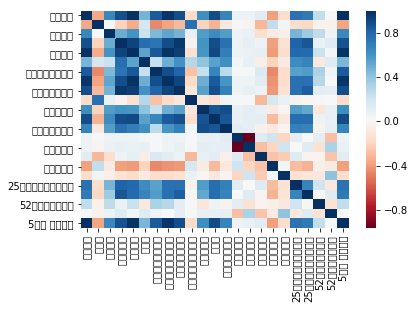

In [360]:
plt.figure()
sns.heatmap(kospi_1_after_5.corr(), cmap='RdBu')

In [357]:
kospi_1_after_5.ca

AttributeError: 'DataFrame' object has no attribute 'call'

In [358]:
kospi_1_after_5.corr().to_csv('kospi_correlation.csv',encoding = 'euc-kr')

- 거래대금, 외국인보유주식수, 외국인보유시가총액
- 상장주식수, 신용거래종목수, 신용자료일자, 전체종목수, 회사수
- 시가총액, 거래형성종목수, 25일이평상회종목건수, 25일이평하회종목건수

### Standardization

In [332]:
from sklearn.preprocessing import StandardScaler

,지수종가,거래량,거래대금,상장주식수,시가총액,자본금,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용가능종목거래량,...,거래형성종목수,상승종목수,하락종목수,보합종목수,상한종목수,하한종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수
0,520.95,231014600,1223328,19638887,191252891,84895076,2723222,58238292,746,419388020,...,853,618,215,22,167,16,26,73,1,85
1,521.43,324584400,1583403,19633559,191363161,84868436,2727918,58249739,746,552328408,...,854,488,316,52,85,6,28,71,1,12
2,558.02,444540900,2984761,19634734,204074166,84873582,2735566,62823637,746,537148329,...,855,752,83,20,149,3,42,57,1,2
3,580.85,578286000,3569582,19637038,212089180,84885103,2747453,65820417,746,542815536,...,855,427,393,37,92,9,43,56,3,2
4,586.65,558645100,2948092,19630735,214231273,84853590,2751599,66348238,746,597686581,...,854,533,278,45,72,5,43,56,6,1


In [349]:
kospi_1_standardized = kospi_1[:-5]

scaler = StandardScaler().fit(kospi_1_standardized)
kospi_1_standardized = pd.DataFrame(transformer.transform(kospi_1_standardized))

kospi_1_standardized.columns = kospi_1.columns
kospi_1_standardized

C:\Users\genie\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


,지수종가,거래량,거래대금,상장주식수,시가총액,자본금,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용가능종목거래량,...,거래형성종목수,상승종목수,하락종목수,보합종목수,상한종목수,하한종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수
0,9.901323e-07,0.439073,0.002325,0.037326,0.363501,0.161354,0.005176,0.110689,1.417869e-06,0.797101,...,1.621236e-06,1.174588e-06,4.086351e-07,4.181382e-08,3.174049e-07,3.041005e-08,4.941634e-08,1.387459e-07,1.900628e-09,1.615534e-07
1,7.704559e-07,0.479600,0.002340,0.029010,0.282755,0.125400,0.004031,0.086069,1.102277e-06,0.816111,...,1.261856e-06,7.210603e-07,4.669161e-07,7.683430e-08,1.255945e-07,8.865496e-09,4.137231e-08,1.049084e-07,1.477583e-09,1.773099e-08
2,7.598311e-07,0.605312,0.004064,0.026736,0.277879,0.115569,0.003725,0.085544,1.015795e-06,0.731411,...,1.164216e-06,1.023965e-06,1.130174e-07,2.723311e-08,2.028867e-07,4.084967e-09,5.718954e-08,7.761437e-08,1.361656e-09,2.723311e-09
3,7.013026e-07,0.698207,0.004310,0.023709,0.256071,0.102488,0.003317,0.079470,9.007002e-07,0.655381,...,1.032304e-06,5.155483e-07,4.744976e-07,4.467280e-08,1.110783e-07,1.086636e-08,5.191704e-08,6.761289e-08,3.622119e-09,2.414746e-09
4,6.879366e-07,0.655097,0.003457,0.023020,0.251219,0.099504,0.003227,0.077803,8.747988e-07,0.700879,...,1.001445e-06,6.250238e-07,3.259974e-07,5.276936e-08,8.443098e-08,5.863263e-09,5.042406e-08,6.566854e-08,7.035915e-09,1.172653e-09
5,7.510610e-07,0.711654,0.003608,0.025000,0.274181,0.108067,0.003507,0.084660,9.497754e-07,0.631568,...,1.087276e-06,6.709539e-07,3.590304e-07,6.238471e-08,8.148207e-08,1.018526e-08,6.111155e-08,6.493102e-08,7.638944e-09,1.273157e-09
6,5.810467e-07,0.665558,0.003404,0.020347,0.212505,0.087955,0.002856,0.066259,7.729193e-07,0.706621,...,8.879247e-07,1.419436e-07,7.231872e-07,2.382995e-08,3.729905e-08,3.626297e-08,4.558773e-08,5.698466e-08,7.252594e-09,2.072170e-09
7,6.901123e-07,0.637289,0.003343,0.024128,0.252515,0.104300,0.003377,0.078244,9.127137e-07,0.715887,...,1.053982e-06,7.051112e-07,2.972769e-07,5.282192e-08,1.068723e-07,1.351258e-08,6.510609e-08,5.650717e-08,6.142084e-09,2.456834e-09
8,6.167666e-07,0.748874,0.004176,0.020607,0.225298,0.089083,0.002910,0.074216,7.795220e-07,0.611992,...,8.991256e-07,5.182825e-07,3.126481e-07,7.134252e-08,2.832718e-08,9.442393e-09,5.980182e-08,4.406450e-08,6.294929e-09,1.049155e-09
9,7.368218e-07,0.752766,0.004192,0.023486,0.268089,0.101070,0.003324,0.088480,9.139542e-07,0.585532,...,1.059104e-06,5.682999e-07,4.108489e-07,8.241579e-08,6.027423e-08,1.353095e-08,7.503527e-08,4.674328e-08,8.610605e-09,2.460173e-09


In [350]:
kospi_standard_correlation = pd.concat([kospi_1_standardized,kospi_after_5],axis = 1)
kospi_standard_correlation.corr()

,지수종가,거래량,거래대금,상장주식수,시가총액,자본금,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용가능종목거래량,...,상승종목수,하락종목수,보합종목수,상한종목수,하한종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수,5일후 지수종가
지수종가,1.000000,-0.801387,0.429729,0.307070,0.918760,-0.169264,0.436511,0.915595,0.173673,-0.794461,...,-0.077846,-0.065524,0.097383,-0.342803,-0.155708,0.343007,0.307937,0.122289,-0.042844,0.680500
거래량,-0.801387,1.000000,-0.145501,0.018100,-0.927979,0.500570,-0.029361,-0.870171,0.213574,0.789392,...,0.330213,0.320234,0.253931,0.478412,0.162211,-0.562874,-0.581723,0.008784,0.027452,-0.870220
거래대금,0.429729,-0.145501,1.000000,-0.015936,0.321586,-0.179903,0.064433,0.213092,-0.047279,-0.212237,...,-0.041735,-0.042201,-0.137115,-0.002879,0.000870,0.109829,-0.006281,0.154510,0.044443,0.278071
상장주식수,0.307070,0.018100,-0.015936,1.000000,0.097945,0.818000,0.774832,0.172559,0.923106,-0.049794,...,0.460649,0.551324,0.716237,0.187841,0.103231,-0.145899,-0.076667,-0.085366,0.181202,-0.292544
시가총액,0.918760,-0.927979,0.321586,0.097945,1.000000,-0.441340,0.165561,0.945466,-0.106427,-0.881109,...,-0.278809,-0.270839,-0.174452,-0.480895,-0.198333,0.570699,0.566772,0.061232,-0.038375,0.889044
자본금,-0.169264,0.500570,-0.179903,0.818000,-0.441340,1.000000,0.628767,-0.320444,0.900212,0.402574,...,0.597333,0.665430,0.762259,0.461930,0.185327,-0.470104,-0.436192,-0.040921,0.123361,-0.736649
외국인보유주식수,0.436511,-0.029361,0.064433,0.774832,0.165561,0.628767,1.000000,0.377115,0.820317,-0.072794,...,0.421194,0.433566,0.708924,0.076727,0.031366,-0.334784,-0.309808,0.199926,0.062366,-0.252692
외국인보유시가총액,0.915595,-0.870171,0.213092,0.172559,0.945466,-0.320444,0.377115,1.000000,0.021357,-0.826629,...,-0.193299,-0.202681,-0.025713,-0.464280,-0.201087,0.437429,0.443905,0.176940,-0.061867,0.773295
신용거래종목수,0.173673,0.213574,-0.047279,0.923106,-0.106427,0.900212,0.820317,0.021357,1.000000,0.139220,...,0.574545,0.632133,0.792074,0.329397,0.137147,-0.373962,-0.316475,0.005754,0.110302,-0.497678
신용가능종목거래량,-0.794461,0.789392,-0.212237,-0.049794,-0.881109,0.402574,-0.072794,-0.826629,0.139220,1.000000,...,0.255587,0.264509,0.171835,0.445819,0.207717,-0.528513,-0.510211,0.006764,0.058221,-0.787984


In [352]:
kospi_standard_correlation.corr().to_csv('kospi_correlaton_standard.csv')

- (+) 시가총액, 외국인보유시가총액, 25일이평상회종목건수, 25일이평하회종목건수
- (-) 거래량, 자본금, 신용가능종목거래량, 신용자료일자, 전체종목수, 회사수, 거래형성종목수, ~~(보합종목수, 상한종목수)~~

## normalization

In [161]:
#from sklearn.preprocessing import Normalizer

In [64]:
#kospi_1_n = kospi_1.drop(['날짜','Y','Y_TF','지수종가','5일후 지수종가'],axis = 1)

#transformer = Normalizer().fit(kospi_1_n)
#kospi_1_n1 = pd.DataFrame(transformer.transform(kospi_1_n))
#kospi_1_n1.columns = kospi_1_n.columns
#kospi_1_n1

,거래량,거래대금,상장주식수,시가총액,자본금,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용가능종목거래량,신용자료일자,...,거래형성종목수,상승종목수,하락종목수,보합종목수,상한종목수,하한종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수
0,0.438756,0.002323,0.037299,0.363238,0.161237,0.005172,0.110609,1.416844e-06,0.796525,0.038004,...,1.620065e-06,1.173740e-06,4.083399e-07,4.178362e-08,3.171756e-07,3.038808e-08,4.938064e-08,1.386456e-07,1.899255e-09,1.614367e-07
1,0.479391,0.002339,0.028998,0.282631,0.125345,0.004029,0.086031,1.101795e-06,0.815754,0.029554,...,1.261304e-06,7.207454e-07,4.667122e-07,7.680073e-08,1.255397e-07,8.861623e-09,4.135424e-08,1.048625e-07,1.476937e-09,1.772325e-08
2,0.605087,0.004063,0.026726,0.277776,0.115526,0.003724,0.085512,1.015418e-06,0.731140,0.027237,...,1.163784e-06,1.023585e-06,1.129755e-07,2.722301e-08,2.028114e-07,4.083451e-09,5.716832e-08,7.758558e-08,1.361150e-09,2.722301e-09
3,0.698003,0.004309,0.023702,0.255996,0.102458,0.003316,0.079447,9.004375e-07,0.655190,0.024153,...,1.032003e-06,5.153979e-07,4.743592e-07,4.465977e-08,1.110459e-07,1.086319e-08,5.190189e-08,6.759316e-08,3.621062e-09,2.414041e-09
4,0.654916,0.003456,0.023014,0.251150,0.099476,0.003226,0.077782,8.745580e-07,0.700686,0.023458,...,1.001170e-06,6.248518e-07,3.259077e-07,5.275484e-08,8.440775e-08,5.861649e-09,5.041018e-08,6.565047e-08,7.033979e-09,1.172330e-09
5,0.711423,0.003607,0.024992,0.274092,0.108032,0.003506,0.084632,9.494673e-07,0.631363,0.025468,...,1.086924e-06,6.707363e-07,3.589139e-07,6.236447e-08,8.145564e-08,1.018196e-08,6.109173e-08,6.490996e-08,7.636466e-09,1.272744e-09
6,0.665415,0.003403,0.020343,0.212460,0.087936,0.002856,0.066244,7.727532e-07,0.706469,0.020728,...,8.877339e-07,1.419131e-07,7.230318e-07,2.382483e-08,3.729104e-08,3.625518e-08,4.557794e-08,5.697242e-08,7.251035e-09,2.071724e-09
7,0.637096,0.003342,0.024120,0.252439,0.104269,0.003376,0.078220,9.124380e-07,0.715671,0.024573,...,1.053663e-06,7.048983e-07,2.971871e-07,5.280597e-08,1.068400e-07,1.350850e-08,6.508643e-08,5.649011e-08,6.140229e-09,2.456092e-09
8,0.748709,0.004175,0.020603,0.225248,0.089063,0.002910,0.074200,7.793503e-07,0.611858,0.020989,...,8.989276e-07,5.181683e-07,3.125792e-07,7.132681e-08,2.832094e-08,9.440313e-09,5.978865e-08,4.405479e-08,6.293542e-09,1.048924e-09
9,0.752538,0.004191,0.023479,0.268008,0.101040,0.003323,0.088453,9.136775e-07,0.585355,0.024607,...,1.058784e-06,5.681278e-07,4.107245e-07,8.239084e-08,6.025598e-08,1.352685e-08,7.501255e-08,4.672913e-08,8.607998e-09,2.459428e-09


In [65]:
#kospi_corr = pd.concat([kospi_1_n1,kospi_1['5일후 지수종가']],axis = 1)
#kospi_corr.corr()

,거래량,거래대금,상장주식수,시가총액,자본금,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용가능종목거래량,신용자료일자,...,상승종목수,하락종목수,보합종목수,상한종목수,하한종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수,5일후 지수종가
거래량,1.000000,-0.143519,0.017243,-0.928095,0.500768,-0.029539,-0.870521,0.213007,0.789618,0.502026,...,0.330325,0.320539,0.253968,0.478753,0.162335,-0.563652,-0.581756,0.008685,0.027561,-0.869860
거래대금,-0.143519,1.000000,-0.015948,0.319705,-0.178518,0.064832,0.211211,-0.047112,-0.210111,-0.102138,...,-0.040821,-0.041018,-0.136124,-0.001701,0.001262,0.106732,-0.006758,0.154300,0.044616,0.279191
상장주식수,0.017243,-0.015948,1.000000,0.098050,0.817323,0.774575,0.172489,0.922940,-0.050619,0.770972,...,0.460083,0.550682,0.715744,0.187266,0.103026,-0.145415,-0.076329,-0.085579,0.181229,-0.294177
시가총액,-0.928095,0.319705,0.098050,1.000000,-0.442206,0.165121,0.945546,-0.106663,-0.881195,-0.425328,...,-0.279353,-0.271572,-0.175104,-0.481414,-0.198521,0.571379,0.567038,0.061236,-0.038499,0.890360
자본금,0.500768,-0.178518,0.817323,-0.442206,1.000000,0.628432,-0.321558,0.899823,0.402784,0.965331,...,0.597257,0.665395,0.762140,0.462139,0.185389,-0.470929,-0.436488,-0.041103,0.123423,-0.738326
외국인보유주식수,-0.029539,0.064832,0.774575,0.165121,0.628432,1.000000,0.376426,0.820205,-0.072964,0.710333,...,0.420954,0.433307,0.708676,0.076620,0.031310,-0.334755,-0.309810,0.199868,0.062357,-0.255231
외국인보유시가총액,-0.870521,0.211211,0.172489,0.945546,-0.321558,0.376426,1.000000,0.020970,-0.826951,-0.276163,...,-0.194025,-0.203607,-0.026616,-0.464906,-0.201304,0.438630,0.444314,0.176826,-0.062002,0.773784
신용거래종목수,0.213007,-0.047112,0.922940,-0.106663,0.899823,0.820205,0.020970,1.000000,0.138653,0.925082,...,0.574220,0.631731,0.791809,0.329089,0.137033,-0.373665,-0.316483,0.005602,0.110303,-0.500255
신용가능종목거래량,0.789618,-0.210111,-0.050619,-0.881195,0.402784,-0.072964,-0.826951,0.138653,1.000000,0.404947,...,0.255727,0.264830,0.171860,0.446147,0.207815,-0.529288,-0.510231,0.006704,0.058319,-0.792432
신용자료일자,0.502026,-0.102138,0.770972,-0.425328,0.965331,0.710333,-0.276163,0.925082,0.404947,1.000000,...,0.628850,0.669026,0.795678,0.474054,0.182162,-0.550646,-0.535365,0.040274,0.074234,-0.747017


## exchange 데이터 전처리 이후 상관분석

In [8]:
# exchange 데이터 불러오기
exchange = pd.read_csv('./exchange_train.csv',encoding = 'utf_8')

In [42]:
exchange.isnull().sum()

날짜        0
USD       0
EUR     220
CNY    1193
JPY      72
GBP    1012
dtype: int64

In [93]:
kospi_date = kospi[['날짜','지수종가']]
kospi_date.head()

,날짜,지수종가
0,2001-01-02,520.95
1,2001-01-03,521.43
2,2001-01-04,558.02
3,2001-01-05,580.85
4,2001-01-08,586.65


In [95]:
exchange_kospi_date = pd.merge(left=exchange, right=kospi_date, how='left', on=['날짜'], sort=False)
exchange_kospi_date = exchange_kospi_date[exchange_kospi_date['지수종가'].isnull()!=True]
exchange_kospi_date

,날짜,USD,EUR,CNY,JPY,GBP,지수종가
0,2001-01-02,1259.7,1185.38,152.19,1099.07,1885.02,520.95
1,2001-01-03,1267.8,1205.49,153.15,1108.07,1903.35,521.43
2,2001-01-04,1285.4,1193.24,155.29,1128.53,1914.15,558.02
3,2001-01-05,1249.3,1190.90,150.92,1078.01,1876.82,580.85
4,2001-01-08,1267.8,1215.06,153.16,1088.71,1906.33,586.65
5,2001-01-09,1264.6,1196.69,152.77,1088.67,1892.98,589.92
6,2001-01-10,1257.9,1187.39,151.97,1074.67,1873.01,560.81
7,2001-01-11,1261.6,1181.93,152.42,1083.57,1876.19,561.79
8,2001-01-12,1276.6,1214.30,154.24,1082.41,1911.20,587.87
10,2001-01-15,1281.2,1218.23,154.79,1078.50,1895.09,599.00


In [98]:
where = pd.merge(left=kospi_date, right=exchange_kospi_date, how='left', on=['날짜'], sort=False)
where[where['지수종가_y'].isnull()==True]

,날짜,지수종가_x,USD,EUR,CNY,JPY,GBP,지수종가_y
175,2001-09-17,468.76,NaN,NaN,NaN,NaN,NaN,NaN
185,2001-10-04,500.64,NaN,NaN,NaN,NaN,NaN,NaN
402,2002-08-23,740.51,NaN,NaN,NaN,NaN,NaN,NaN
500,2003-01-16,648.69,NaN,NaN,NaN,NaN,NaN,NaN
539,2003-03-13,531.78,NaN,NaN,NaN,NaN,NaN,NaN
681,2003-10-13,757.02,NaN,NaN,NaN,NaN,NaN,NaN
884,2004-08-06,733.95,NaN,NaN,NaN,NaN,NaN,NaN
908,2004-09-09,821.88,NaN,NaN,NaN,NaN,NaN,NaN
917,2004-09-22,835.10,NaN,NaN,NaN,NaN,NaN,NaN
927,2004-10-11,881.11,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
where_delete = where[where['지수종가_y'].isnull()==False]
where_delete.corr()

,지수종가_x,USD,EUR,CNY,JPY,GBP,지수종가_y
지수종가_x,1.000000,-0.408111,0.268799,0.161681,0.201016,-0.528673,1.000000
USD,-0.408111,1.000000,0.253113,0.614837,0.544875,0.271419,-0.408111
EUR,0.268799,0.253113,1.000000,0.473643,0.709894,0.435812,0.268799
CNY,0.161681,0.614837,0.473643,1.000000,0.654489,-0.014408,0.161681
JPY,0.201016,0.544875,0.709894,0.654489,1.000000,0.131261,0.201016
GBP,-0.528673,0.271419,0.435812,-0.014408,0.131261,1.000000,-0.528673
지수종가_y,1.000000,-0.408111,0.268799,0.161681,0.201016,-0.528673,1.000000


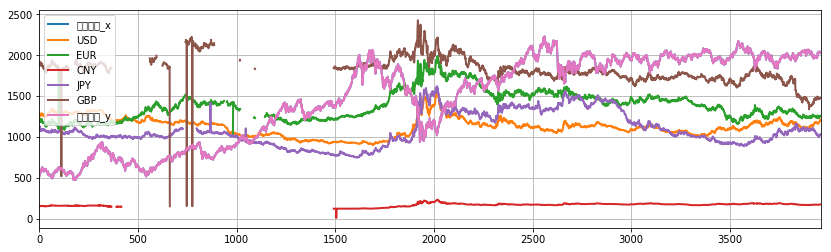

In [103]:
where_delete.plot()

> USD는 결측값 없음. EUR, CNY, JPY, GBP 결측값 존재

### 결측치 처리를 위해 변수간의 상관관계 파악하기

In [35]:
# 사용할 데이터
exchange_1

,날짜,USD,EUR,CNY,JPY,GBP
3959,2004-09-22,NaN,NaN,NaN,NaN,NaN
3960,2004-10-11,NaN,NaN,NaN,NaN,NaN
3961,2004-10-13,NaN,NaN,NaN,NaN,NaN


In [104]:
# 결측치 개수 확인
exchange_1.isnull().sum()

날짜        0
USD      11
EUR     190
CNY    1141
JPY      80
GBP     959
dtype: int64

In [28]:
# 상관관계 테이블
exchange_1.corr()

,USD,EUR,CNY,JPY,GBP
USD,1.000000,0.253113,0.614837,0.544875,0.271419
EUR,0.253113,1.000000,0.473643,0.709894,0.435812
CNY,0.614837,0.473643,1.000000,0.654489,-0.014408
JPY,0.544875,0.709894,0.654489,1.000000,0.131261
GBP,0.271419,0.435812,-0.014408,0.131261,1.000000


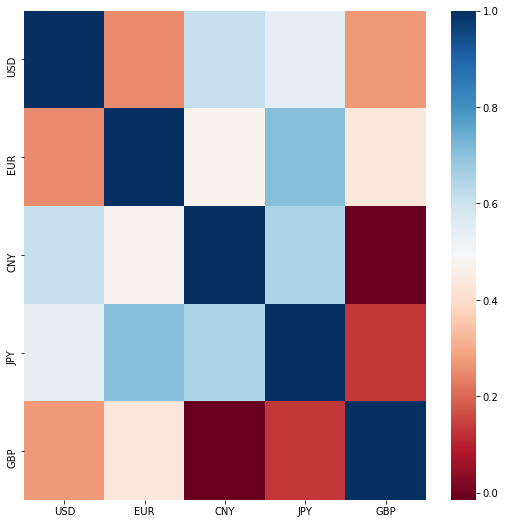

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(exchange_1.corr(), cmap='RdBu')

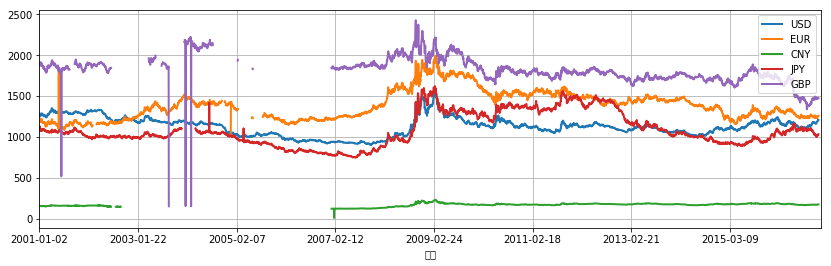

In [31]:
# USD, EUR, CNY, JPY, GBP의 전체적인 추세 확인하기
#fig = plt.gcf()
#fig.set_size_inches(11,8)
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

exchange_1.plot(x='날짜')

- 화폐 종류 전체의 추이를 비교하기 위한 그래프
- 유로(EUR-주황색), 파운드(GBP-보라색), 엔화(

In [34]:
exchange_kospi = pd.concat([kospi_after_5,exchange_1],axis = 1)
exchange_kospi.tail(6)

,5일후 지수종가,날짜,USD,EUR,CNY,JPY,GBP
3956,2026.46,2003-10-13,NaN,NaN,NaN,NaN,NaN
3957,NaN,2004-08-06,NaN,NaN,NaN,NaN,NaN
3958,NaN,2004-09-09,NaN,NaN,NaN,NaN,NaN
3959,NaN,2004-09-22,NaN,NaN,NaN,NaN,NaN
3960,NaN,2004-10-11,NaN,NaN,NaN,NaN,NaN
3961,NaN,2004-10-13,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207D47310F0>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

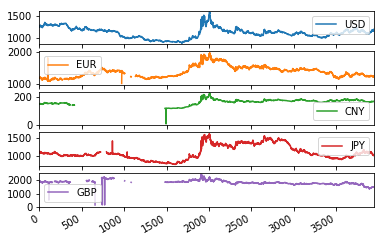

In [385]:
plt.figure(figsize=(20,20))
exchange_1.plot(subplots=True)

In [274]:
## exchange_2 = exchange_1의 결측치 처리 ver.
exchange_2 = fill_na(exchange_1)

### standardization & 상관분석

In [197]:
scaler = StandardScaler().fit(exchange_2)
exchange_s = pd.DataFrame(transformer.transform(exchange_2))

exchange_s.columns = exchange_2.columns
exchange_s

,USD,EUR,CNY,JPY,GBP
0,0.451729,0.425078,0.054575,0.394127,0.675969
1,0.450080,0.427960,0.054370,0.393375,0.675706
2,0.453389,0.420882,0.054774,0.398058,0.675164
3,0.450617,0.429552,0.054436,0.388833,0.676960
4,0.450308,0.431575,0.054401,0.386697,0.677106
5,0.452128,0.427848,0.054619,0.389228,0.676790
6,0.453953,0.428508,0.054843,0.387829,0.675935
7,0.454471,0.425771,0.054907,0.390339,0.675867
8,0.452697,0.430605,0.054695,0.383835,0.677734
9,0.454974,0.431915,0.054871,0.382992,0.675836


In [199]:
exchange_cor = pd.concat([exchange_s,kospi_after_5],axis = 1)
exchange_cor[:-5].corr()

,USD,EUR,CNY,JPY,GBP,5일후 지수종가
USD,1.000000,-0.628449,0.367829,0.051997,-0.156878,-0.449114
EUR,-0.628449,1.000000,-0.032324,0.258015,-0.471873,0.590933
CNY,0.367829,-0.032324,1.000000,0.144935,-0.248800,0.207899
JPY,0.051997,0.258015,0.144935,1.000000,-0.865506,0.337923
GBP,-0.156878,-0.471873,-0.248800,-0.865506,1.000000,-0.371633
5일후 지수종가,-0.449114,0.590933,0.207899,0.337923,-0.371633,1.000000


In [234]:
rate_G = exchange_2['GBP'] / exchange_2['USD']
rate_J = exchange_2['JPY'] / exchange_2['USD']
rate_C = exchange_2['CNY'] / exchange_2['USD']
rate_E = exchange_2['EUR'] / exchange_2['USD']
exchange_rate = pd.concat([rate_G,rate_J,rate_C,rate_E],axis = 1)
kospi_after_5_1 = kospi['지수종가'].shift(5)
exchange_rate_kospi = pd.concat([kospi_after_5_1,exchange_rate],axis = 1)
exchange_rate_kospi

,지수종가,0,1,2,3
0,NaN,1.496404,0.872486,0.120814,0.941002
1,NaN,1.501301,0.874010,0.120800,0.950852
2,NaN,1.489147,0.877960,0.120811,0.928302
3,NaN,1.502297,0.862891,0.120804,0.953254
4,NaN,1.503652,0.858740,0.120808,0.958400
5,520.95,1.496900,0.860881,0.120805,0.946299
6,521.43,1.488998,0.854337,0.120812,0.943946
7,558.02,1.487151,0.858886,0.120815,0.936850
8,580.85,1.497102,0.847885,0.120821,0.951198
9,586.65,1.485439,0.841789,0.120602,0.949317


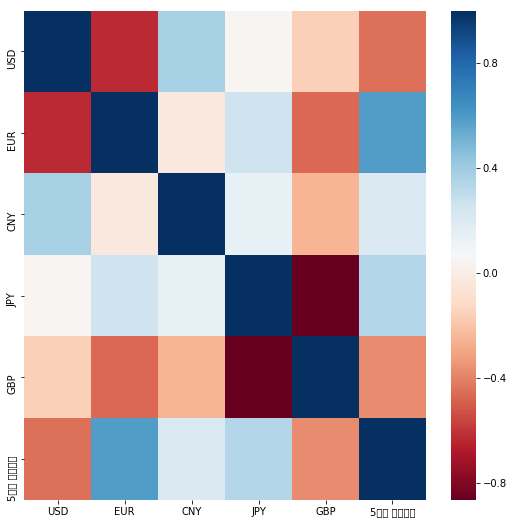

In [221]:
plt.figure(figsize=(9, 9))
corr = exchange_cor[:-5].corr()
sns.heatmap(corr, cmap='RdBu')

In [278]:
kospi_after_5_1 = kospi[['날짜','지수종가']].shift(-5)
kospi_after_5_1
#exchange_cor_no = pd.concat([exchange_2,kospi_after_5_1],axis = 1)
#exchange_cor_no

,날짜,지수종가
0,2001-01-09,589.92
1,2001-01-10,560.81
2,2001-01-11,561.79
3,2001-01-12,587.87
4,2001-01-15,599.00
5,2001-01-16,603.42
6,2001-01-17,595.83
7,2001-01-18,604.05
8,2001-01-19,619.78
9,2001-01-22,627.45


In [207]:
exchange_2.head(4)

,USD,EUR,CNY,JPY,GBP
0,1259.7,1185.38,152.19,1099.07,1885.02
1,1267.8,1205.49,153.15,1108.07,1903.35
2,1285.4,1193.24,155.29,1128.53,1914.15
3,1249.3,1190.90,150.92,1078.01,1876.82


In [210]:
def after_5(x,col_n):
    ans = x[col_n] - x[col_n].shift(5)
    ans.columns
    return ans

In [216]:
#usd_after5 = 
#eur_after5 = after_5(exchange,'EUR')
#cny_after5 = after_5(exchange,'CNY')
#jpy_after5 = after_5(exchange,'JPY')
#gbp_after5 = after_5(exchange,'GBP')

exchange_after5 = exchange_2.shift(5)

exchange_after_5 = pd.concat([exchange_after5,kospi_after_5],axis = 1)
exchange_after_5[:-5].corr()

,USD,EUR,CNY,JPY,GBP,5일후 지수종가
USD,1.000000,0.228709,0.502275,0.532891,0.238588,-0.397558
EUR,0.228709,1.000000,0.438040,0.697794,0.372483,0.316505
CNY,0.502275,0.438040,1.000000,0.578138,-0.016562,0.172129
JPY,0.532891,0.697794,0.578138,1.000000,0.094751,0.236205
GBP,0.238588,0.372483,-0.016562,0.094751,1.000000,-0.406508
5일후 지수종가,-0.397558,0.316505,0.172129,0.236205,-0.406508,1.000000


In [194]:
exchange.isnull().sum()

날짜        0
USD       0
EUR     220
CNY    1193
JPY      72
GBP    1012
dtype: int64

In [ ]:
for i in range(exchange_cor.shape[1]):
    for j in range(exchange_cor.shape[0]):
        if exchange_cor

모든 col은 0을 포함하지 않는다. -> 결측치 na를 0으로 변환

0으로 변환 후 결측값이 포함된 row만 확인 -> 연속된 시간이 없음을 확인

### 결측치 처리 모듈 만들기

> i번째 값이 결측값(NaN)인 경우, i-1번째 값과 i+1번째 값의 평균으로 채워넣는 함수

> 만약 일정 구간이 모두 결측치인 경우(i-1번째 값, i+1번째 값이 없을 때) 전체 columns의 평균으로 채워넣는다

In [116]:
def fill_na(x):
    n_col = x.shape[1] # col 범위 지정
    n_row = x.shape[0] # row 범위 지정
    
    for i in range(n_col):
        for j in range(n_row):
            if pd.isnull(x.iloc[j,i]) is True:
                if pd.isnull(x.iloc[j+1,i]) is False and pd.isnull(x.iloc[j-1,i]) is False:
                    na_mean = np.mean([x.iloc[j-1,i],x.iloc[j+1,i]])
                    x.iloc[j,i] = na_mean
                else:
                    na_mean = np.nanmean(x.iloc[:,i])
                    x.iloc[j,i] = na_mean
    return x

In [195]:
fill_na(exchange_1)

,USD,EUR,CNY,JPY,GBP
0,1259.7,1185.380,152.190,1099.07,1885.020
1,1267.8,1205.490,153.150,1108.07,1903.350
2,1285.4,1193.240,155.290,1128.53,1914.150
3,1249.3,1190.900,150.920,1078.01,1876.820
4,1267.8,1215.060,153.160,1088.71,1906.330
5,1264.6,1196.690,152.770,1088.67,1892.980
6,1257.9,1187.390,151.970,1074.67,1873.010
7,1261.6,1181.930,152.420,1083.57,1876.190
8,1276.6,1214.300,154.240,1082.41,1911.200
9,1281.2,1216.265,154.515,1078.50,1903.145


In [118]:
# 제대로 나왔는지 확인
exchange_1.isnull().sum()

USD    0
EUR    0
CNY    0
JPY    0
GBP    0
dtype: int64

## per와 5일후 지수종가의 상관분석

> per에 있는 변수들의 전처리 및 정규화 -> 5일후 지수종가와 상관분석

#### per.csv불러오기

In [170]:
# per = 초기 train set data
per = pd.read_csv('./per_train.csv',encoding = 'utf_8')
per.head(5)

,날짜,코스피,코스피 200,코스피 100,코스피 50,코스피 대형주,코스피 중형주,코스피 소형주,제조업,음식료품,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
0,2001-01-02,15.89,13.34,10.92,12.32,10.83,3.12,23.45,8.33,4.54,...,5.15,8.94,6.54,1.96,57.59,-,-,14.08,-,9.84
1,2001-01-03,15.89,13.33,10.91,12.31,10.82,3.15,24.03,8.37,4.6,...,5.11,8.81,6.69,2.01,56.84,-,-,14.43,-,9.98
2,2001-01-04,16.99,14.29,11.70,13.22,11.61,3.33,25.2,9.01,4.69,...,5.45,9.18,7.42,2.15,60.23,-,-,16.56,-,10.51
3,2001-01-05,17.69,14.90,12.21,13.80,12.09,3.44,25.27,9.30,4.72,...,5.91,9.48,8.21,2.36,62.25,-,-,18.39,-,10.83
4,2001-01-08,17.87,15.04,12.32,13.91,12.20,3.51,25.86,9.40,4.72,...,6.08,9.43,8.17,2.33,63.13,-,-,18.62,-,11.03


In [171]:
# per_1 = '날짜'를 없앤 per ver.1
per_1 = per.drop('날짜',axis = 1)
fill_na(per_1)

,코스피,코스피 200,코스피 100,코스피 50,코스피 대형주,코스피 중형주,코스피 소형주,제조업,음식료품,섬유의복,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
0,15.89,13.34,10.92,12.32,10.83,3.12,23.45,8.33,4.54,-,...,5.15,8.94,6.54,1.96,57.59,-,-,14.08,-,9.84
1,15.89,13.33,10.91,12.31,10.82,3.15,24.03,8.37,4.6,-,...,5.11,8.81,6.69,2.01,56.84,-,-,14.43,-,9.98
2,16.99,14.29,11.70,13.22,11.61,3.33,25.2,9.01,4.69,-,...,5.45,9.18,7.42,2.15,60.23,-,-,16.56,-,10.51
3,17.69,14.90,12.21,13.80,12.09,3.44,25.27,9.30,4.72,-,...,5.91,9.48,8.21,2.36,62.25,-,-,18.39,-,10.83
4,17.87,15.04,12.32,13.91,12.20,3.51,25.86,9.40,4.72,-,...,6.08,9.43,8.17,2.33,63.13,-,-,18.62,-,11.03
5,18.06,15.16,12.38,13.95,12.24,3.62,28.84,9.53,4.86,-,...,6.28,9.16,7.91,2.35,63.60,-,-,18.7,-,11.32
6,17.17,14.40,11.76,13.26,11.63,3.42,27.57,9.12,4.64,-,...,6.04,8.54,7.34,2.13,61.20,-,-,16.69,-,11.08
7,17.2,14.38,11.73,13.23,11.61,3.53,28.41,9.06,4.62,-,...,6.16,8.48,7.68,2.17,60.42,-,-,18.9,-,11.29
8,18.02,15.13,12.35,13.93,12.26,3.59,28.62,9.52,4.71,-,...,6.4,8.74,7.72,2.22,65.48,-,-,18.69,-,11.83
9,16.63,15.47,12.61,14.20,12.52,3.69,31.93,9.76,4.77,-,...,6.68,8.69,7.64,2.31,66.68,-,-,18.96,-,12.11


#### per.csv의 *섬유의복*  문제

- 일정 기간 외에 데이터가 존재하지 않는다.

In [123]:
# per_1에서 변수 '섬유의복'의 null 개수 구하기
per_1[['섬유의복']].isnull().sum()

섬유의복    0
dtype: int64

In [124]:
# np.NaN형식이 아닌 문자열 '-'로 처리된 결측값 확인
per_1[per['섬유의복']=='-']

,코스피,코스피 200,코스피 100,코스피 50,코스피 대형주,코스피 중형주,코스피 소형주,제조업,음식료품,섬유의복,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
0,15.89,13.34,10.92,12.32,10.83,3.12,23.45,8.33,4.54,-,...,5.15,8.94,6.54,1.96,57.59,-,-,14.08,-,9.84
1,15.89,13.33,10.91,12.31,10.82,3.15,24.03,8.37,4.6,-,...,5.11,8.81,6.69,2.01,56.84,-,-,14.43,-,9.98
2,16.99,14.29,11.70,13.22,11.61,3.33,25.2,9.01,4.69,-,...,5.45,9.18,7.42,2.15,60.23,-,-,16.56,-,10.51
3,17.69,14.90,12.21,13.80,12.09,3.44,25.27,9.30,4.72,-,...,5.91,9.48,8.21,2.36,62.25,-,-,18.39,-,10.83
4,17.87,15.04,12.32,13.91,12.20,3.51,25.86,9.40,4.72,-,...,6.08,9.43,8.17,2.33,63.13,-,-,18.62,-,11.03
5,18.06,15.16,12.38,13.95,12.24,3.62,28.84,9.53,4.86,-,...,6.28,9.16,7.91,2.35,63.60,-,-,18.7,-,11.32
6,17.17,14.40,11.76,13.26,11.63,3.42,27.57,9.12,4.64,-,...,6.04,8.54,7.34,2.13,61.20,-,-,16.69,-,11.08
7,17.2,14.38,11.73,13.23,11.61,3.53,28.41,9.06,4.62,-,...,6.16,8.48,7.68,2.17,60.42,-,-,18.9,-,11.29
8,18.02,15.13,12.35,13.93,12.26,3.59,28.62,9.52,4.71,-,...,6.4,8.74,7.72,2.22,65.48,-,-,18.69,-,11.83
9,16.63,15.47,12.61,14.20,12.52,3.69,31.93,9.76,4.77,-,...,6.68,8.69,7.64,2.31,66.68,-,-,18.96,-,12.11


In [128]:
# per_sumU = per 중에서 '날짜'와 '섬유의복'만 포함한 데이터
per_sumU = per[['날짜','섬유의복']]

# per_sumU_kospi = per_sumU와 5일후 지수종가를 합친 데이터
per_sumU_kospi = pd.concat([per_sumU,kospi_after_5],axis = 1)

per_sumU_kospi.head(5)

,날짜,섬유의복,5일후 지수종가
0,2001-01-02,-,520.95
1,2001-01-03,-,521.43
2,2001-01-04,-,558.02
3,2001-01-05,-,580.85
4,2001-01-08,-,586.65


In [129]:
# per_sumU_kospi의 null개수 확인
per_sumU_kospi.isnull().sum()

날짜          0
섬유의복        0
5일후 지수종가    5
dtype: int64

In [132]:
# per_sumU_kospi에서 '섬유의복'이 결측값이 아닌 구간만 추출
per_sumU_kospi = per_sumU_kospi[per_sumU_kospi['섬유의복']!='-']
per_sumU_kospi = per_sumU_kospi[:-5]
per_sumU_kospi.tail(6)

,날짜,섬유의복,5일후 지수종가
3951,2016-12-15,32.89,2036.65
3952,2016-12-16,32.92,2042.24
3953,2016-12-19,32.76,2038.39
3954,2016-12-20,32.75,2041.94
3955,2016-12-21,32.57,2037.96
3956,2016-12-22,32.38,2035.73


In [138]:
# object로 된 data type을 numeric으로 변경
per_sumU_kospi['섬유의복'] = pd.to_numeric(per_sumU_kospi['섬유의복'])

In [139]:
# 상관분석
per_sumU_kospi.corr()

,섬유의복,5일후 지수종가
섬유의복,1.000000,0.017007
5일후 지수종가,0.017007,1.000000


> 결측값이 아닌 구간의 섬유의복 지수와 5일후 지수종가의 상관분석 결과, 두 변수는 상관관계가 존재하지 않는다.
따라서 섬유의복을 사용하지 않는다.

### per_1(날짜제외 ver.)의 전처리 및 상관분석

In [172]:
# data type 확인 -> 다수 object 존재 -> numeric으로 변환할 필요가 있다
per_1.dtypes

코스피         object
코스피 200    float64
코스피 100    float64
코스피 50     float64
코스피 대형주    float64
코스피 중형주     object
코스피 소형주     object
제조업        float64
음식료품        object
섬유의복        object
종이목재        object
화학          object
의약품         object
비금속광물       object
철강금속       float64
기계          object
전기전자       float64
의료정밀        object
운수장비       float64
유통업         object
전기가스업       object
건설업         object
운수창고업       object
통신업        float64
금융업         object
은행          object
증권          object
보험          object
서비스업       float64
dtype: object

In [173]:
# '-'으로 처리된 결측치를 np.NaN으로 변환하기

for i in range(per_1.shape[1]):
    for j in range(per_1.shape[0]):
        if per_1.iloc[j,i]=='-':
            per_1.iloc[j,i] = np.NaN
per_1.head(5)

,코스피,코스피 200,코스피 100,코스피 50,코스피 대형주,코스피 중형주,코스피 소형주,제조업,음식료품,섬유의복,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
0,15.89,13.34,10.92,12.32,10.83,3.12,23.45,8.33,4.54,NaN,...,5.15,8.94,6.54,1.96,57.59,NaN,NaN,14.08,NaN,9.84
1,15.89,13.33,10.91,12.31,10.82,3.15,24.03,8.37,4.6,NaN,...,5.11,8.81,6.69,2.01,56.84,NaN,NaN,14.43,NaN,9.98
2,16.99,14.29,11.70,13.22,11.61,3.33,25.2,9.01,4.69,NaN,...,5.45,9.18,7.42,2.15,60.23,NaN,NaN,16.56,NaN,10.51
3,17.69,14.90,12.21,13.80,12.09,3.44,25.27,9.30,4.72,NaN,...,5.91,9.48,8.21,2.36,62.25,NaN,NaN,18.39,NaN,10.83
4,17.87,15.04,12.32,13.91,12.20,3.51,25.86,9.40,4.72,NaN,...,6.08,9.43,8.17,2.33,63.13,NaN,NaN,18.62,NaN,11.03


In [174]:
# object형식의 변수를 모두 numeric(float)로 변환하기

for i in range(per_1.shape[1]):
    per_1.iloc[:,i] = pd.to_numeric(per_1.iloc[:,i],errors='coerce').fillna(0).astype(float)
per_1.dtypes

코스피        float64
코스피 200    float64
코스피 100    float64
코스피 50     float64
코스피 대형주    float64
코스피 중형주    float64
코스피 소형주    float64
제조업        float64
음식료품       float64
섬유의복       float64
종이목재       float64
화학         float64
의약품        float64
비금속광물      float64
철강금속       float64
기계         float64
전기전자       float64
의료정밀       float64
운수장비       float64
유통업        float64
전기가스업      float64
건설업        float64
운수창고업      float64
통신업        float64
금융업        float64
은행         float64
증권         float64
보험         float64
서비스업       float64
dtype: object

In [159]:
per_1.head(5)

,코스피,코스피 200,코스피 100,코스피 50,코스피 대형주,코스피 중형주,코스피 소형주,제조업,음식료품,섬유의복,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
0,15.89,13.34,10.92,12.32,10.83,3.12,23.45,8.33,4.54,0.0,...,5.15,8.94,6.54,1.96,57.59,0.0,0.0,14.08,0.0,9.84
1,15.89,13.33,10.91,12.31,10.82,3.15,24.03,8.37,4.60,0.0,...,5.11,8.81,6.69,2.01,56.84,0.0,0.0,14.43,0.0,9.98
2,16.99,14.29,11.70,13.22,11.61,3.33,25.20,9.01,4.69,0.0,...,5.45,9.18,7.42,2.15,60.23,0.0,0.0,16.56,0.0,10.51
3,17.69,14.90,12.21,13.80,12.09,3.44,25.27,9.30,4.72,0.0,...,5.91,9.48,8.21,2.36,62.25,0.0,0.0,18.39,0.0,10.83
4,17.87,15.04,12.32,13.91,12.20,3.51,25.86,9.40,4.72,0.0,...,6.08,9.43,8.17,2.33,63.13,0.0,0.0,18.62,0.0,11.03


### normalization

In [178]:
# normalization
transformer = Normalizer().fit(per_1)
per_1_nor = pd.DataFrame(transformer.transform(per_1))
per_1_nor.columns = per_1.columns

# per_1_kospi = per의 변수와 5일후 지수종가의 corr분석을 위한 dataset
per_1_kospi = pd.concat([per_1_nor,kospi_after_5],axis = 1)

# 상관분석
per_1_kospi[:-5].corr()

,코스피,코스피 200,코스피 100,코스피 50,코스피 대형주,코스피 중형주,코스피 소형주,제조업,음식료품,섬유의복,...,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업,5일후 지수종가
코스피,1.000000,0.839179,0.815979,0.833860,0.873400,0.009026,-0.061457,0.719865,0.125482,-0.358966,...,-0.048082,-0.125921,-0.114863,0.687728,0.132535,0.518868,0.141810,0.027482,0.145361,-0.443180
코스피 200,0.839179,1.000000,0.995329,0.991692,0.966495,0.210710,-0.127474,0.924547,0.230350,-0.322606,...,-0.015583,-0.066298,-0.053595,0.560140,0.284106,0.367419,0.214406,0.263846,0.380832,-0.362401
코스피 100,0.815979,0.995329,1.000000,0.994885,0.969606,0.238675,-0.148782,0.927635,0.241014,-0.306348,...,-0.016745,-0.059021,-0.031060,0.501478,0.322355,0.375250,0.204553,0.294608,0.412743,-0.344807
코스피 50,0.833860,0.991692,0.994885,1.000000,0.969230,0.208814,-0.140477,0.915229,0.213412,-0.325567,...,-0.049881,-0.032938,-0.015405,0.526286,0.336233,0.377691,0.213921,0.287488,0.404255,-0.386658
코스피 대형주,0.873400,0.966495,0.969606,0.969230,1.000000,0.139426,-0.118481,0.892812,0.198134,-0.352142,...,-0.032996,-0.094276,-0.065506,0.536096,0.258182,0.524542,0.134897,0.209288,0.298748,-0.406161
코스피 중형주,0.009026,0.210710,0.238675,0.208814,0.139426,1.000000,-0.380392,0.122554,0.294925,0.302878,...,0.339366,0.004553,-0.135145,-0.095026,0.143680,-0.114142,0.047050,0.407763,0.454508,0.447364
코스피 소형주,-0.061457,-0.127474,-0.148782,-0.140477,-0.118481,-0.380392,1.000000,-0.027242,-0.188251,-0.253512,...,-0.207103,0.148330,0.301937,0.034887,-0.101740,-0.047454,-0.158342,-0.111388,-0.311163,-0.233789
제조업,0.719865,0.924547,0.927635,0.915229,0.892812,0.122554,-0.027242,1.000000,0.164862,-0.354007,...,-0.130667,-0.068785,0.064543,0.381481,0.386642,0.298145,0.136673,0.305240,0.327323,-0.421667
음식료품,0.125482,0.230350,0.241014,0.213412,0.198134,0.294925,-0.188251,0.164862,1.000000,0.396187,...,-0.044595,-0.000777,-0.167061,0.089564,-0.111375,-0.177060,0.414474,0.363167,0.446923,0.427449
섬유의복,-0.358966,-0.322606,-0.306348,-0.325567,-0.352142,0.302878,-0.253512,-0.354007,0.396187,1.000000,...,-0.039053,0.130217,-0.189698,-0.286755,-0.161919,-0.368480,0.258861,0.192825,0.121920,0.544592


> normalization 결과 모든 변수가 유의하지 않아 per의 변수는 사용하지 않는다.

## market 데이터 전처리 및 5일후 지수종가의 상관관계

#### 데이터 불러오기

In [179]:
market = pd.read_csv('./market_train.csv', encoding = 'utf_8')

#### 데이터 탐색

In [180]:
market.head(5)

,날짜,A등급 구리(현물),니켈(현물),알루미늄 99.7%(현물),금괴(일간),미국1년,미국3년,미국10년,국고채권(1년),국고채권(3년),국고채권(10년),Dram Exchange 지수,브랜트유 가격,원유 WTI
0,2001-01-01,NaN,NaN,NaN,273.0,NaN,NaN,5.1,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-02,1746.3,6935.0,1552.5,270.6,5.2,4.8,4.9,6.7,6.7,7.2,NaN,24.3,27.2
2,2001-01-03,1716.8,6370.0,1515.5,267.5,5.1,4.9,5.2,6.6,6.6,7.2,NaN,25.0,28.0
3,2001-01-04,1750.5,6569.0,1519.0,267.7,4.9,4.8,5.0,6.4,6.4,6.9,NaN,25.4,28.1
4,2001-01-05,1740.3,6607.0,1527.5,268.2,4.6,4.6,4.9,6.2,6.2,6.7,NaN,25.2,28.0


In [181]:
market.dtypes

날짜                   object
A등급 구리(현물)          float64
니켈(현물)              float64
알루미늄 99.7%(현물)      float64
금괴(일간)              float64
미국1년                float64
미국3년                float64
미국10년               float64
국고채권(1년)            float64
국고채권(3년)            float64
국고채권(10년)           float64
Dram Exchange 지수    float64
브랜트유 가격             float64
원유 WTI              float64
dtype: object

In [182]:
market.describe()

,A등급 구리(현물),니켈(현물),알루미늄 99.7%(현물),금괴(일간),미국1년,미국3년,미국10년,국고채권(1년),국고채권(3년),국고채권(10년),Dram Exchange 지수,브랜트유 가격,원유 WTI
count,4041.000000,4041.000000,4042.000000,4144.000000,4018.000000,4038.000000,4108.000000,3978.000000,3978.000000,3978.000000,3861.000000,4103.000000,4024.000000
mean,5398.770601,16469.412522,1930.024913,902.129223,1.614858,2.142224,3.457984,3.662519,3.930744,4.523680,4147.403859,67.812990,64.624727
std,2469.775909,8435.696246,453.750373,462.206368,1.664593,1.490772,1.127828,1.272688,1.324517,1.421064,1855.807450,31.885463,27.817133
min,1318.300000,4346.000000,1242.500000,256.000000,0.100000,0.300000,1.400000,1.200000,1.200000,1.400000,794.700000,17.700000,17.500000
25%,3142.000000,10329.000000,1567.250000,423.775000,0.200000,0.900000,2.400000,2.700000,2.900000,3.500000,2964.400000,41.000000,40.800000
50%,5924.000000,15020.000000,1836.750000,914.100000,0.800000,1.600000,3.700000,3.500000,4.000000,4.900000,3435.400000,63.300000,62.300000
75%,7436.800000,19485.000000,2232.950000,1271.600000,2.500000,3.400000,4.400000,4.800000,4.900000,5.400000,4764.300000,100.450000,89.900000
max,10179.500000,54050.000000,3271.300000,1898.300000,5.300000,5.300000,5.500000,6.700000,6.900000,8.000000,14118.900000,146.100000,145.300000


### normalization

In [ ]:
# normalization
transformer = Normalizer().fit(market)
market_nor = pd.DataFrame(transformer.transform(market))
market_nor.columns = market.columns

# per_1_kospi = per의 변수와 5일후 지수종가의 corr분석을 위한 dataset
market_kospi = pd.concat([per_1_nor,kospi_after_5],axis = 1)

# 상관분석
per_1_kospi[:-5].corr()